**Numerical Methods in Science and Engineering**  
**Chapter:** 5  
**Exercise:** 16  
  
**Author:** Supakorn Suttiruang (Lum) 6031857321  
  

**Problem Statement:** 
Plot the distribution of the data and fit them by an appropriate polynomial. Then, plot to compare distribution of the fitted polynomial with the data. Also, determine the total error of the fitted polynomial from the given data.

| $\sigma(MPa)$ | $\epsilon \times 10^3$ | $\sigma(MPa)$ | $\epsilon \times 10^3$ |
|---------------|------------------------|---------------|------------------------|
| 57.5          | 0.15                   | 383.0         |  1.66                  |
| 123.5         | 0.52                   | 423.0         | 1.86                   |
| 191.8         | 0.76                   | 465.8         | 2.08                   |
| 236.0         | 1.01                   | 497.5         | 2.27                   |
| 267.7         | 1.12                   | 530.6         | 2.56                   |
| 309.1         | 1.42                   | 576.2         | 2.86                   |
| 354.0         | 1.52                   | 613.4         | 3.19                   |

**Derivation of Solution:** (The derivation of solution is included in the section below)

**Code Listing and Tabulated Solution:** 

Preamble:

In [9]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['figure.dpi'] = 100
%config InlineBackend.figure_format = 'retina'

We first define the data table,

In [37]:
x = np.asarray([57.5, 123.5, 191.8, 236.0, 267.7, 309.1, 354.0, 383.0, 423.0, 465.8, 497.5, 530.6, 576.2, 613.4])
y = np.asarray([0.15, 0.52, 0.76, 1.01, 1.12, 1.42, 1.52, 1.66, 1.86, 2.08, 2.27, 2.56, 2.86, 3.19])

Then we plot the distribution,

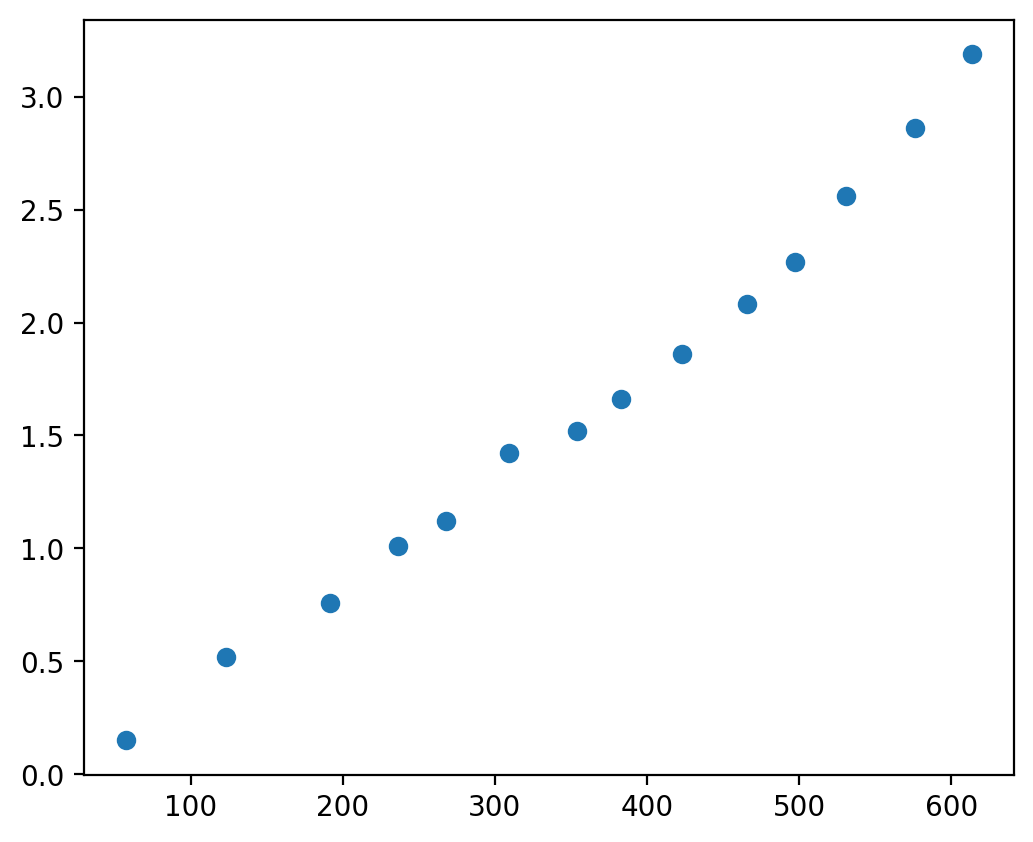

In [38]:
plt.plot(x, y, 'o')
plt.show()

The distribution looks like a quadratic one, so we will choose $m = 2$ to fit this polynomial. This means that we will have $m + 1 = 3$ unknowns to solve.

We now set up the system shown in Equation 5.37

In [39]:
n = len(x)

m = 2

a = sym.symbols('a:{}'.format(m+1))

A = sym.Matrix([
    [n, np.sum(np.power(x, 1)), np.sum(np.power(x, 2))],
    [np.sum(np.power(x, 1)), np.sum(np.power(x, 2)), np.sum(np.power(x, 3))],
    [np.sum(np.power(x, 2)), np.sum(np.power(x, 3)), np.sum(np.power(x, 4))]
])

b = sym.Matrix([
    np.sum(y),
    np.sum(np.multiply(x, y)),
    np.sum(np.multiply(np.power(x, 2), y)),
])

And solve for the three unknowns,

In [40]:
soln = next(iter(sym.linsolve((A, b), a)))
display(soln)

a0 = soln[0]
a1 = soln[1]
a2 = soln[2]

(0.038286045038647, 0.00317928901308091, 2.95633202701395e-6)

Now the fitted curve can be defined and plotted,

In [41]:
g = lambda x: a0 + (a1 * x) + (a2 * (x ** 2))

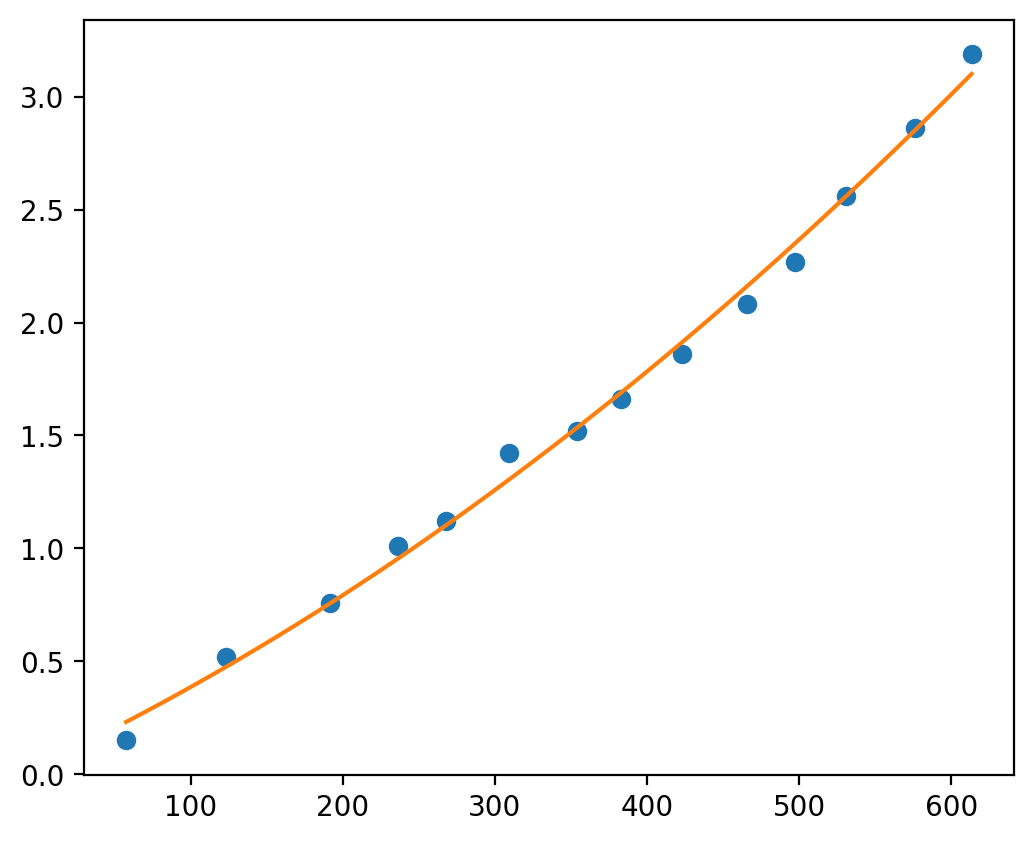

In [42]:
plt.plot(x, y, 'o')

dx = 0.1
x_range = np.arange(x[0], x[-1] + dx, dx)

plt.plot(x_range, g(x_range))

plt.show()

Then we compute the total error,

In [46]:
E = np.sum(np.square(y - g(x)))
display(E)

0.0506365443551212